<h1><center>LOG6953C - TP1</center></h1>

In [1]:
# Vérifier la version de python utilisée
!python -V

Python 3.8.0


In [22]:
# Installation des librairies requises
%pip install qiskit[visualization] numpy prettytable

In [23]:
import numpy as np
from qiskit import *
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from prettytable import PrettyTable

### Questions

Q1. Demi-additionneur quantique.

a) Implémenter une version quantique du demi-additionneur en utilisant Qiskit [35 points]

Utilisez des portes quantiques de base telles que la porte X, la porte de Hadamard, la porte CNOT
et la porte de Toffoli. À l'aide d'un simulateur quantique tel que Aer, exécutez le circuit plusieurs
fois avec différentes entrées selon la table de vérité (vous pouvez utiliser la porte Hadamard pour
générer aléatoirement différentes entrées). Fournissez un résumé statistique des résultats (vous
pouvez utiliser un tableau ou des figures) et comparez les résultats avec la table de vérité.
Fournissez les détails de votre implémentation (code et commentaires) et une visualisation du
circuit résultant.

In [25]:
table = PrettyTable()
table.field_names = ["A", "B", "Sum", "Carry", "Certainty"]

for i in [1, 0]:
    for j in [1, 0]:
        
        # Use Aer's qasm_simulator
        simulator = QasmSimulator()
        inputs = QuantumRegister(2, name='inputs')
        outputs = QuantumRegister(2, name='outputs')
        bit_output = ClassicalRegister(2, name='bit_output')

        # Create a Quantum Circuit acting on the q register
        circuit = QuantumCircuit(inputs, outputs, bit_output)

        # We initialize the gates in order to create the truth table
        circuit.initialize([i, int(not i)], inputs[0])
        circuit.initialize([j, int(not j)], inputs[1])

        circuit.cx(inputs[0], outputs[0])  # Apply CX gate to qubit A, B in order to get Sum output (classical XOR)
        circuit.cx(inputs[1], outputs[0]) 
        circuit.ccx(inputs[0], inputs[1], outputs[1])  # Apply CCX gate to qubit A, B, 0 in order to get Carry output (classical AND)

        # Map the quantum measurement to the classical bits
        circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
        circuit.measure(outputs[1], bit_output[1])  # Carry sera le bit de poids fort, à droite dans le bitstring, donc à l'index 0 dans le bitstring
        backend = BasicAer.get_backend('qasm_simulator')

        # Compiler
        transpile(circuit, backend)

        # Run
        job = execute(circuit, backend, shots=1000)

        count = job.result().get_counts()
        output = list(count.keys())[0]
        table.add_row([f"|{int(not i)}>", f"|{int(not j)}>", f"|{output[1]}>", f"|{output[0]}>", count[output]])

print(table)

+-----+-----+-----+-------+-----------+
|  A  |  B  | Sum | Carry | Certainty |
+-----+-----+-----+-------+-----------+
| |0> | |0> | |0> |  |0>  |    1000   |
| |0> | |1> | |1> |  |0>  |    1000   |
| |1> | |0> | |1> |  |0>  |    1000   |
| |1> | |1> | |0> |  |1>  |    1000   |
+-----+-----+-----+-------+-----------+


Les bitstring de l'Output sont représentés avec le bit de poids faible à droite. 
Ainsi, on retrouve bien la table de vérité attendue.

In [26]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()
inputs = QuantumRegister(2, name='inputs')
outputs = QuantumRegister(2, name='outputs')
bit_output = ClassicalRegister(2, name='bit_output')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(inputs, outputs, bit_output)

# Apply Hadamard gate to the qubits
circuit.h(inputs[0])  
circuit.h(inputs[1])

# Apply CX gate to qubit A, B in order to get Sum output (classical XOR)
circuit.cx(inputs[0], outputs[0])  
circuit.cx(inputs[1], outputs[0]) 

# Apply CCX gate to qubit A, B, 0 in order to get Carry output (classical AND)
circuit.ccx(inputs[0], inputs[1], outputs[1])  

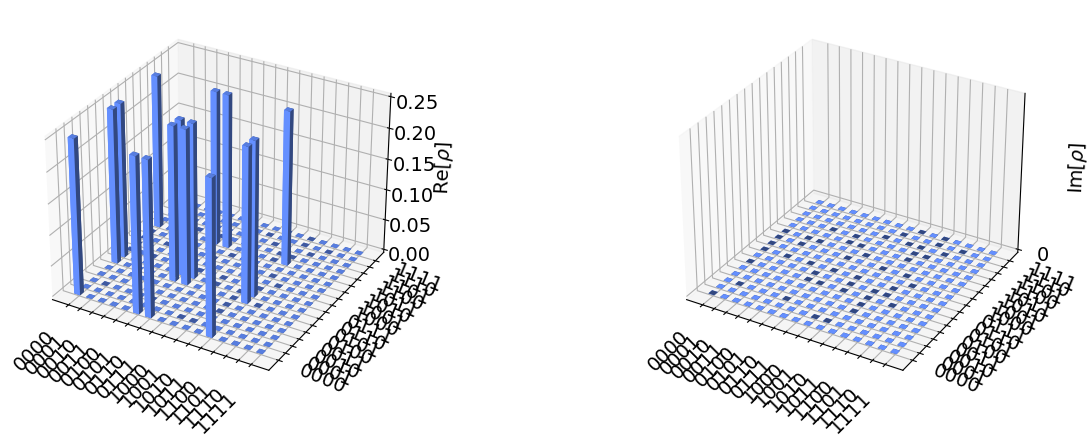

In [27]:
plot_state_city(circuit)

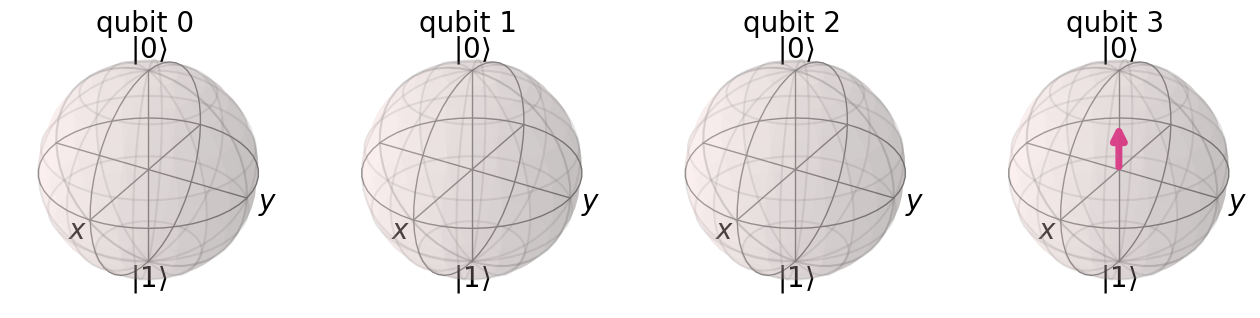

In [28]:
plot_bloch_multivector(circuit)

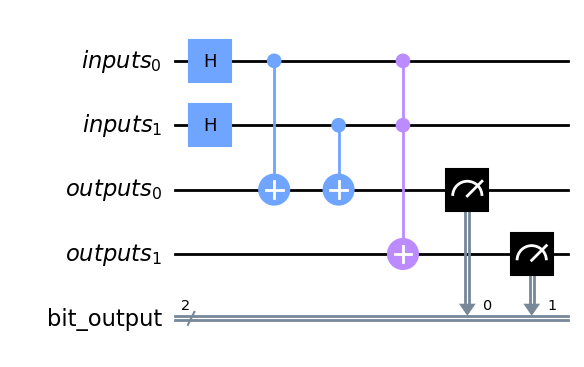

In [29]:

# Map the quantum measurement to the classical bits
circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
circuit.measure(outputs[1], bit_output[1])  # Carry sera le bit de poids fort, à droite dans le bitstring, donc à l'index 0 dans le bitstring

circuit.draw(output='mpl')

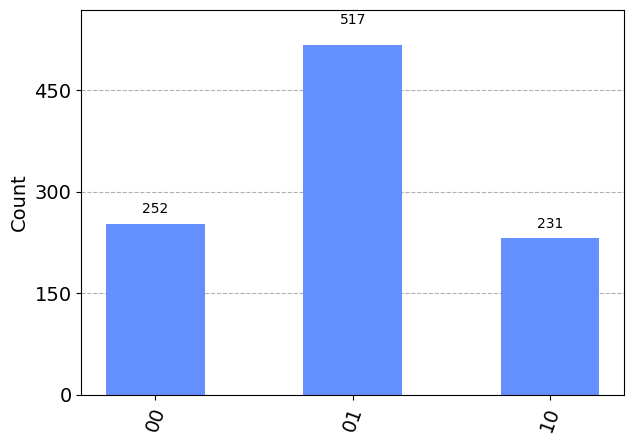

In [30]:
backend = BasicAer.get_backend('qasm_simulator')

# Compiler
transpile(circuit, backend)

# Run
job = execute(circuit, backend, shots=1000)

count = job.result().get_counts()
plot_histogram(count)

b) Calculez la représentation matricielle du circuit demi-additionneur, c'est-à-dire déterminez la
matrice A dans l'équation AI = O, où I est le vecteur d'entrée et O est le vecteur de sortie.
Rapportez le processus de calcul. [15 points]

Cf rapport

Q2. Additionneur complet quantique.
a) Implémenter la version quantique de l’additionneur complet en utilisant Qiskit [35 points]
Les exigences sont les mêmes que pour Q1.

b) Calculez la représentation matricielle du circuit additionneur complet, c'est-à-dire déterminez
la matrice B dans l'équation BI = O, où I est le vecteur d'entrée et O est le vecteur de sortie.
Rapportez le processus de calcul. [15 points]